# Classification

| **Hyperparameter**          | **Binary Classification**                                                                                  | **Multiclass Classification**                                                                       |
|------------------------------|-----------------------------------------------------------------------------------------------------------|----------------------------------------------------------------------------------------------------|
| **Input layer shape**        | Same as number of features (e.g. 5 for age, sex, height, weight, smoking status in heart disease prediction) | Same as binary classification                                                                     |
| **Hidden layer(s)**          | Problem specific, minimum = 1, maximum = unlimited                                                       | Same as binary classification                                                                     |
| **Neurons per hidden layer** | Problem specific, generally 10 to 100                                                                    | Same as binary classification                                                                     |
| **Output layer shape**       | 1 (one class or the other)                                                                               | 1 per class (e.g. 3 for food, person, or dog photo)                                               |
| **Hidden activation**        | Usually ReLU (rectified linear unit)                                                                     | Same as binary classification                                                                     |
| **Output activation**        | Sigmoid                                                                                                  | Softmax                                                                                           |
| **Loss function**            | Cross entropy (`tf.keras.losses.BinaryCrossentropy` in TensorFlow)                                       | Cross entropy (`tf.keras.losses.CategoricalCrossentropy` in TensorFlow)                           |
| **Optimizer**                | SGD (stochastic gradient descent), Adam                                                                 | Same as binary classification                                                                     |

In [1]:
from sklearn.datasets import make_circles

# Make 1000 examples
n_samples = 1000

# Create circles
X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)


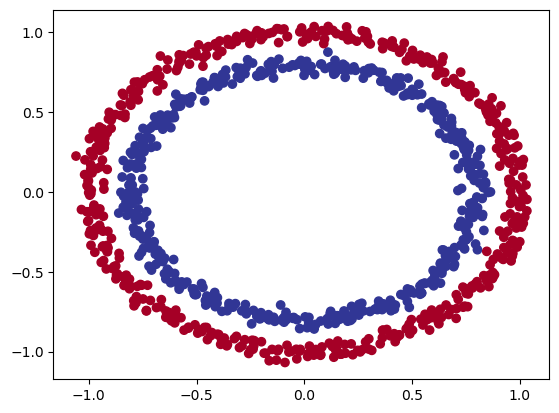

In [6]:

# Visualize with a plot
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu);


In [7]:
import numpy as np

def plot_decision_boundary(model, X, y):
    """
    Plots the decision boundary created by a model predicting on X.
    This function has been adapted from two phenomenal resources:
     1. CS231n - https://cs231n.github.io/neural-networks-case-study/
     2. Made with ML basics - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb
    """
    # Define the axis boundaries of the plot and create a meshgrid
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))

    # Create X values (we're going to predict on all of these)
    x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together: https://numpy.org/devdocs/reference/generated/numpy.c_.html

    # Make predictions using the trained model
    y_pred = model.predict(x_in)

    # Check for multi-class
    if model.output_shape[-1] > 1: # checks the final dimension of the model's output shape, if this is > (greater than) 1, it's multi-class
        print("doing multiclass classification...")
        # We have to reshape our predictions to get them ready for plotting
        y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
    else:
        print("doing binary classifcation...")
        y_pred = np.round(np.max(y_pred, axis=1)).reshape(xx.shape)

    # Plot decision boundary
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

In [8]:
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [61]:
import tensorflow as tf
# Set random seed
tf.random.set_seed(42)

# 1. Create the model using the Sequential API
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(), # binary since we are working with 2 clases (0 & 1)
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['accuracy'])

# 3. Fit the model
model_1.fit(X, y, epochs=5)

Epoch 1/5
32/32 [==============================] - 0s 429us/step - loss: 4.3836 - accuracy: 0.4690
Epoch 2/5
32/32 [==============================] - 0s 380us/step - loss: 6.3137 - accuracy: 0.4950
Epoch 3/5
32/32 [==============================] - 0s 358us/step - loss: 7.6246 - accuracy: 0.5000
Epoch 4/5
32/32 [==============================] - 0s 324us/step - loss: 7.6246 - accuracy: 0.5000
Epoch 5/5
32/32 [==============================] - 0s 319us/step - loss: 7.6246 - accuracy: 0.5000


313/313 [==============================] - 0s 221us/step
doing binary classifcation...


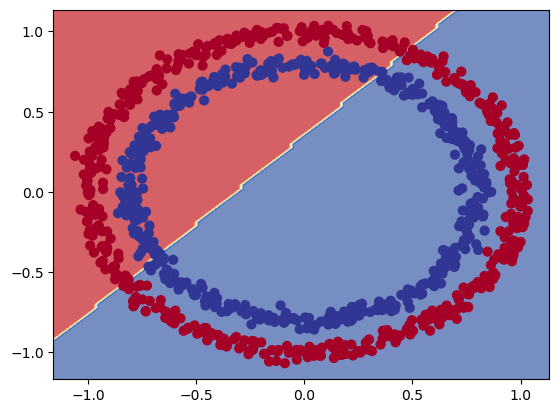

In [62]:
plot_decision_boundary(model_1,X,y)

In [59]:
import tensorflow as tf
# Set random seed
tf.random.set_seed(42)

# 1. Create the model using the Sequential API
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation=tf.keras.activations.tanh), 
    tf.keras.layers.Dense(10, activation=tf.keras.activations.tanh),
    tf.keras.layers.Dense(1, activation=tf.keras.activations.sigmoid) 
])

# 2. Compile the model
model_2.compile(loss=tf.keras.losses.binary_crossentropy, # binary since we are working with 2 clases (0 & 1)
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

# 3. Fit the model
model_2.fit(X, y, epochs=150)

Epoch 1/150
32/32 [==============================] - 0s 452us/step - loss: 0.6988 - accuracy: 0.4990
Epoch 2/150
32/32 [==============================] - 0s 415us/step - loss: 0.6948 - accuracy: 0.5010
Epoch 3/150
32/32 [==============================] - 0s 395us/step - loss: 0.6931 - accuracy: 0.5080
Epoch 4/150
32/32 [==============================] - 0s 351us/step - loss: 0.6931 - accuracy: 0.5190
Epoch 5/150
32/32 [==============================] - 0s 334us/step - loss: 0.6927 - accuracy: 0.5200
Epoch 6/150
32/32 [==============================] - 0s 336us/step - loss: 0.6925 - accuracy: 0.5880
Epoch 7/150
32/32 [==============================] - 0s 340us/step - loss: 0.6920 - accuracy: 0.5170
Epoch 8/150
32/32 [==============================] - 0s 347us/step - loss: 0.6921 - accuracy: 0.5530
Epoch 9/150
32/32 [==============================] - 0s 328us/step - loss: 0.6916 - accuracy: 0.5370
Epoch 10/150
32/32 [==============================] - 0s 324us/step - loss: 0.6915 - accura

313/313 [==============================] - 0s 232us/step
doing binary classifcation...


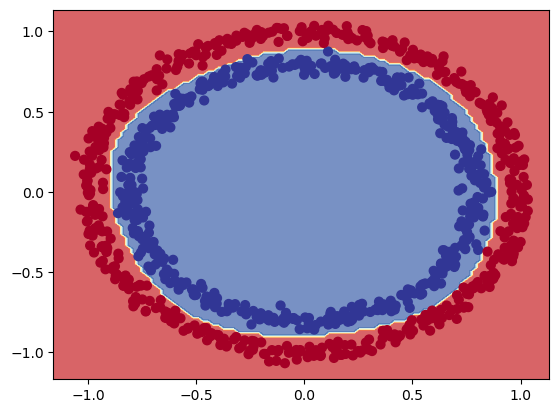

In [60]:
plot_decision_boundary(model_2,X,y)

In [63]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [73]:
tf.random.set_seed(42)

model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation=tf.keras.activations.tanh),
    tf.keras.layers.Dense(10, activation=tf.keras.activations.tanh),
    tf.keras.layers.Dense(1, activation=tf.keras.activations.sigmoid)
])

model_4.compile(loss=tf.keras.losses.binary_crossentropy,
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=['accuracy'])

history = model_4.fit(X_train, y_train, epochs=100)

Epoch 1/100
25/25 [==============================] - 0s 458us/step - loss: 0.7010 - accuracy: 0.4988
Epoch 2/100
25/25 [==============================] - 0s 424us/step - loss: 0.6958 - accuracy: 0.4975
Epoch 3/100
25/25 [==============================] - 0s 398us/step - loss: 0.6928 - accuracy: 0.5300
Epoch 4/100
25/25 [==============================] - 0s 366us/step - loss: 0.6931 - accuracy: 0.5163
Epoch 5/100
25/25 [==============================] - 0s 355us/step - loss: 0.6921 - accuracy: 0.5337
Epoch 6/100
25/25 [==============================] - 0s 339us/step - loss: 0.6920 - accuracy: 0.5512
Epoch 7/100
25/25 [==============================] - 0s 384us/step - loss: 0.6914 - accuracy: 0.5275
Epoch 8/100
25/25 [==============================] - 0s 336us/step - loss: 0.6911 - accuracy: 0.5337
Epoch 9/100
25/25 [==============================] - 0s 333us/step - loss: 0.6912 - accuracy: 0.5175
Epoch 10/100
25/25 [==============================] - 0s 338us/step - loss: 0.6910 - accura

In [74]:
model_4.evaluate(X_test, y_test)

7/7 [==============================] - 0s 488us/step - loss: 0.6031 - accuracy: 0.8200


[0.6030513048171997, 0.8199999928474426]

313/313 [==============================] - 0s 227us/step
doing binary classifcation...


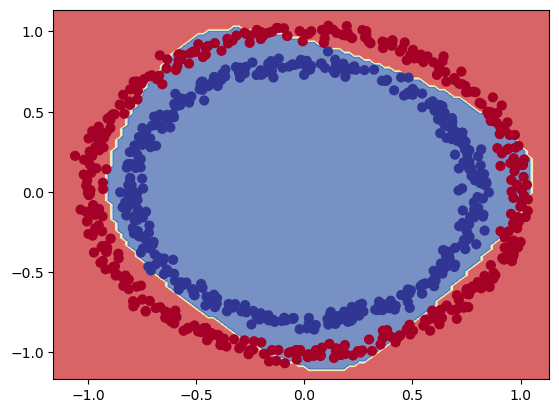

In [75]:
plot_decision_boundary(model_4, X_train, y_train)

313/313 [==============================] - 0s 232us/step
doing binary classifcation...


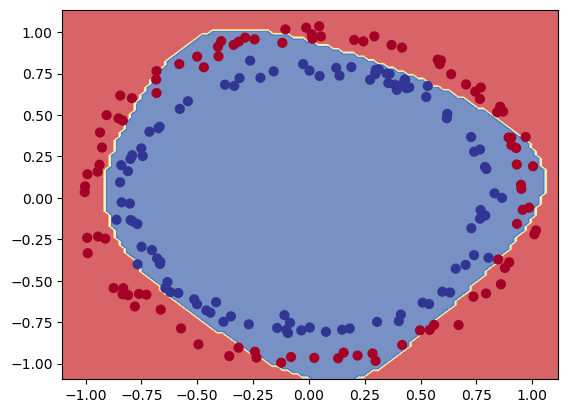

In [76]:
plot_decision_boundary(model_4, X_test, y_test)